### Install

pip install scikit-image

set path to 'C:\Users\skydr\AppData\Roaming\Python\Python39\Scripts'

In [4]:
import skimage as ski

In [5]:
imCam=ski.data.camera()

### Reading images from disk

import os;

filename = os.path.join(ski.data_dir, 'moon.png');

moon = ski.io.imread(filename)

### Show images using pyplot

In [6]:
import matplotlib.pyplot as plt

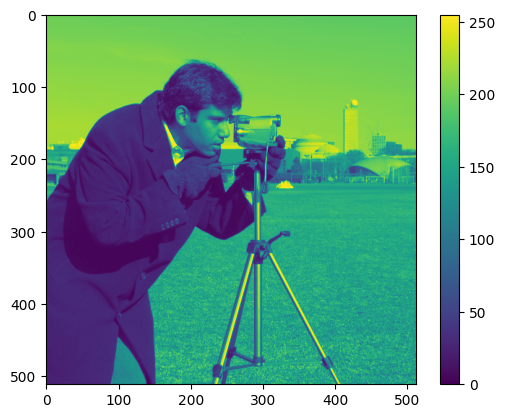

In [45]:

imgplot=plt.imshow(imCam)
plt.colorbar();

### Reading images from disk with pil module

In [31]:
from PIL import Image as pilImage
import numpy as np

img = np.asarray(Image.open('../../doc/_static/stinkbug.png'))

### Downsampling with image processing module Pillow (pil)

In [24]:
imCamPil=pilImage.fromarray(imCam)

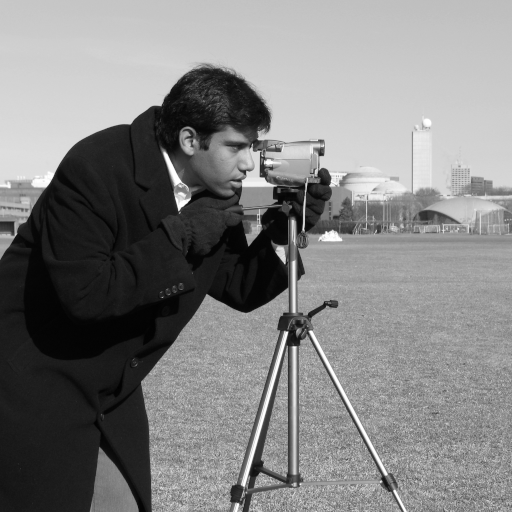

In [25]:
imCamPil

In [27]:
imCamPil.thumbnail((30,30))

In [28]:
imCamPil

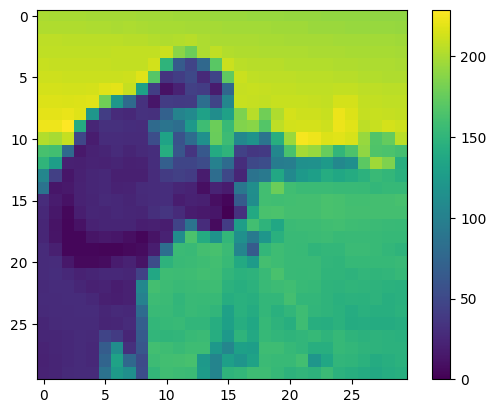

In [30]:
plt.imshow(imCamPil)
plt.colorbar();

### Grayscale conversion
convert 3-channel (depth=3) image to 1-channel considering human sensitivity to light

In [34]:
def rgb2gray(rgb):#provided by https://saturncloud.io/blog/how-to-convert-an-image-to-grayscale-using-numpy-arrays-a-comprehensive-guide/
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])



### Histogram

In [57]:
imCam.shape #512*512=262144

(512, 512)

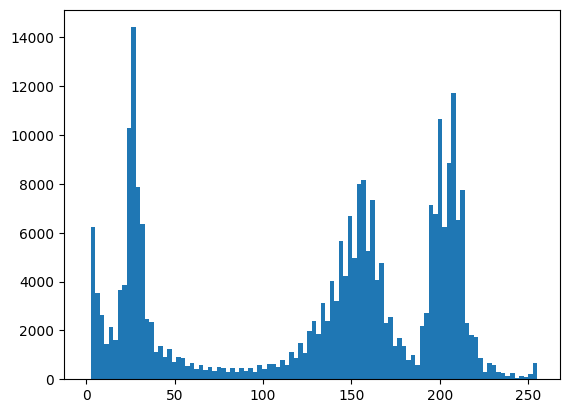

In [55]:
plt.hist(np.reshape(imCam,(262144,1)),bins=100);

### Convolve

In [89]:
from skimage.filters import gabor_kernel
import math

#### Gabor-Kernel
further kernels are found here https://scikit-image.org/docs/stable/api/skimage.filters.html

In [103]:
kGaborDeg0=gabor_kernel(theta=0,frequency=0.2)

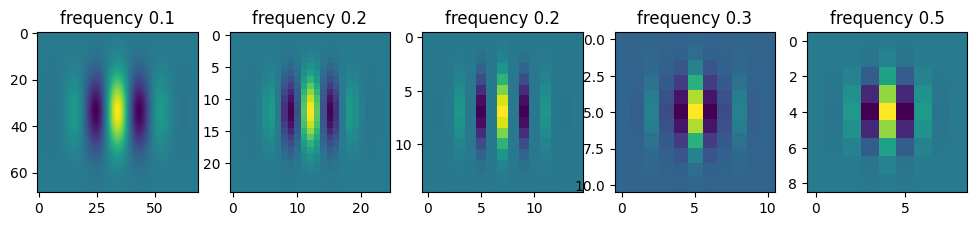

In [93]:
fig,axes=plt.subplots(ncols=5,figsize=(12,5))

for i in range(5):
    freq=0.05+i/10
    axes[i].imshow(gabor_kernel(theta=0,frequency=freq).real)
    axes[i].set_title("frequency "+str(round(freq,1)))


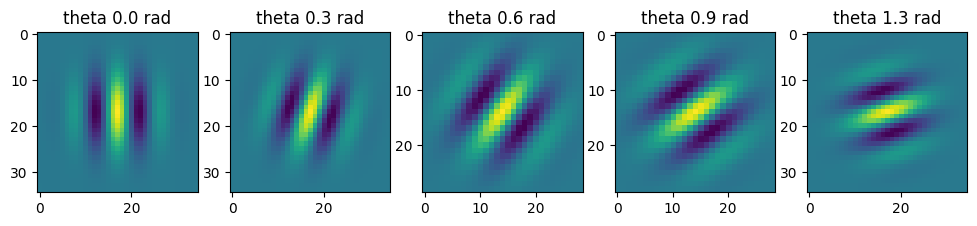

In [94]:
fig,axes=plt.subplots(ncols=5,figsize=(12,5))

for i in range(5):
    theta=(i/10)*math.pi
    axes[i].imshow(gabor_kernel(theta=theta,frequency=0.1).real)
    axes[i].set_title("theta "+str(round(theta,1))+" rad")


In [95]:
from scipy import ndimage

In [124]:
kGaborDeg50=gabor_kernel(theta=math.radians(-50),frequency=0.2)
featureGaborDeg0=ndimage.convolve(imCam,kGaborDeg0.real,mode="nearest")
featureGaborDeg50=ndimage.convolve(imCam,kGaborDeg50.real,mode="nearest")

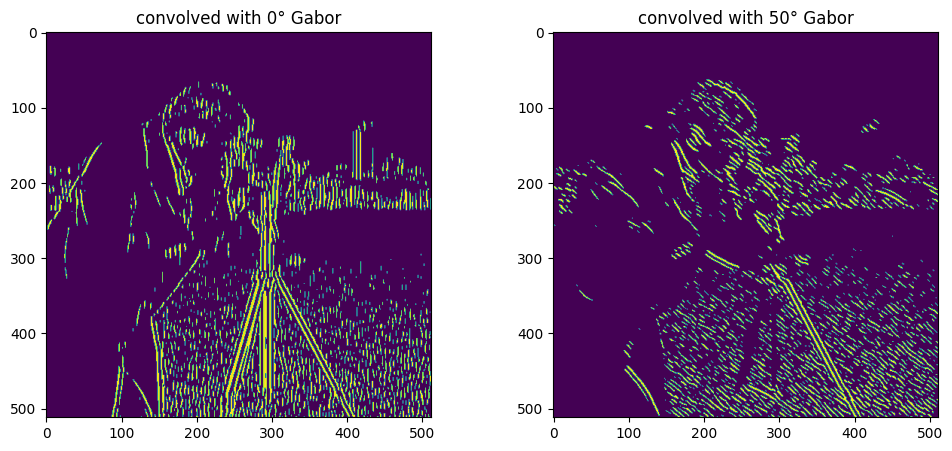

In [133]:
fig,axes=plt.subplots(ncols=2,figsize=(12,5))
axes[0].imshow(featureGaborDeg0);
axes[0].set_title("convolved with 0° Gabor");
axes[1].imshow(featureGaborDeg50);
axes[1].set_title("convolved with 50° Gabor");